## Problem statement : Predict whether mushroom is poisonus or not !

# Attributes information

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s 
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s 
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y 
4. bruises?: bruises=t,no=f 
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s 
6. gill-attachment: attached=a,descending=d,free=f,notched=n 
7. gill-spacing: close=c,crowded=w,distant=d 
8. gill-size: broad=b,narrow=n 
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y 
10. stalk-shape: enlarging=e,tapering=t 
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=? 
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s 
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s 
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
16. veil-type: partial=p,universal=u 
17. veil-color: brown=n,orange=o,white=w,yellow=y 
18. ring-number: none=n,one=o,two=t 
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z 
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y 
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y 
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

In [2]:
# import the necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics#Import scikit-learn metrics module for accuracy calculation
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [3]:
# set the working directory
os.chdir('D:\Reg')

In [3]:
# read the data set
data = pd.read_csv('mushrooms.csv')

In [4]:
# check all the columns
data.columns.to_list()

['class',
 'cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

In [8]:
# count of missing values in each column
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [9]:
# dimension of the data set
data.shape

(8124, 23)

In [15]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [10]:
# separate DV and IV
Y = data['class']
X=data.iloc[:,1:23]

In [11]:
# few values of Target variable
Y.head()

0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object

In [12]:
# convert categories of dependent variables into 1s and 0s
Y= Y.map({'p':1, 'e':0})

In [14]:
Y.head()

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int64

In [16]:
# all the variables are categorical in nature so convert into numeric
X = pd.get_dummies(X)
print(X.shape)

(8124, 117)


In [17]:
# spread of 1s and 0s in target variable
Y.value_counts()

0    4208
1    3916
Name: class, dtype: int64

In [18]:
# split the data set into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=50)

## Decision Trees model build

In [19]:
clf2 = DecisionTreeClassifier(max_depth=2,criterion="entropy",random_state=1)

# Train Decision Tree Classifer
dt2 = clf2.fit(X_train,Y_train)

#Predict the response for test dataset
Y_pred = clf2.predict(X_test)

In [29]:
Y_train.value_counts()

0    3405
1    3094
Name: class, dtype: int64

In [20]:
# calculate accuracy on test set
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.9224615384615384


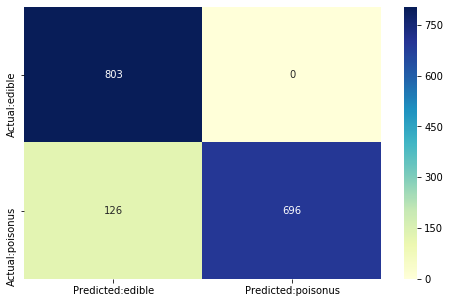

In [21]:
# create a confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:edible','Predicted:poisonus'],index=['Actual:edible','Actual:poisonus'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

In [24]:
# estimate metrics of confusion matrix
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

print('True Negative Rate is :', TN/(TN+FP))
print('True Positive Rate is :', TP/(TP+FN))

True Negative Rate is : 1.0
True Positive Rate is : 0.8467153284671532


In [25]:
print("TP value is ", TP)
print("TN value is ", TN)
print("FP value is ", FP)
print("FN value is ", FN)

TP value is  696
TN value is  803
FP value is  0
FN value is  126


In [26]:
# select all the input variables
feature_cols = X.columns.to_list()

In [27]:
# import packages for tree plot
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

/Users/nikhilkosare/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


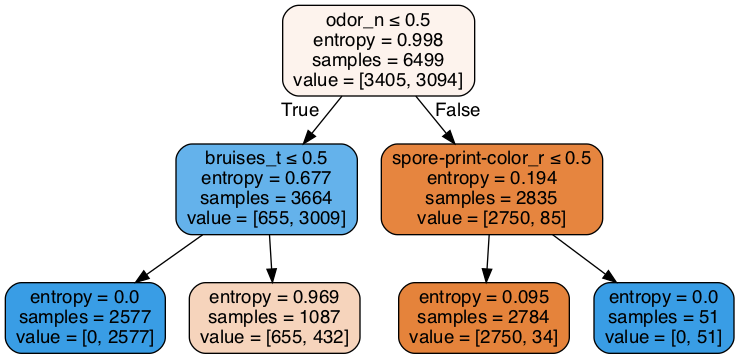

<Figure size 864x1296 with 0 Axes>

In [28]:
plt.figure(figsize=(12,18))
dot_data = StringIO()
export_graphviz(clf2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('default.png')
Image(graph.create_png())

In [31]:
# create a decision tree with entropy as metrics and with depth of 3
clf3 = DecisionTreeClassifier(max_depth=3,criterion="entropy",random_state=1)

# Train Decision Tree Classifer
dt3 = clf3.fit(X_train,Y_train)

#Predict the response for test dataset
Y_pred3 = clf3.predict(X_test)

In [32]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred3))

Accuracy: 0.9655384615384616


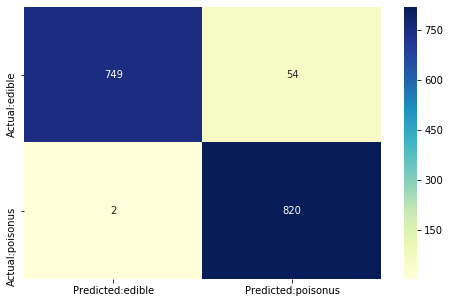

In [33]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_pred3)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:edible','Predicted:poisonus'],index=['Actual:edible','Actual:poisonus'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

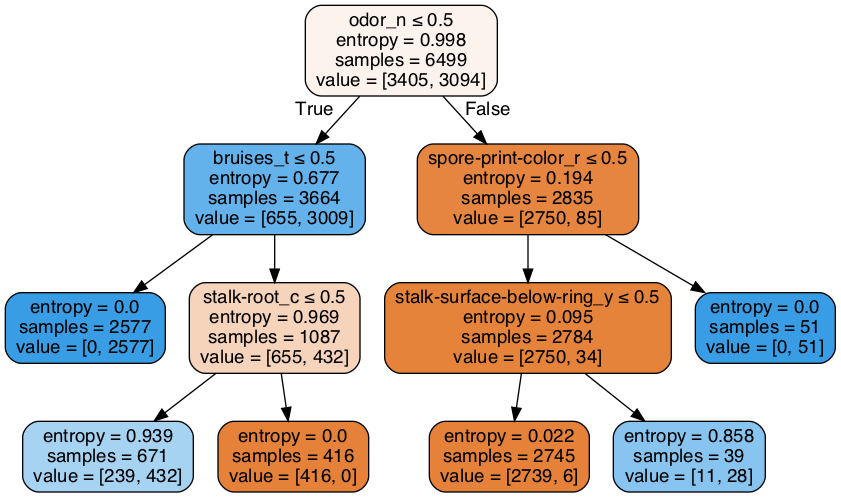

<Figure size 864x1296 with 0 Axes>

In [34]:
plt.figure(figsize=(12,18))
dot_data = StringIO()
export_graphviz(clf3, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('default.png')
Image(graph.create_png())

In [35]:
# build a decision tree with depth of 4 and metrics as entropy
clf4 = DecisionTreeClassifier(max_depth=4,criterion="entropy",random_state=1)

# Train Decision Tree Classifer
dt4 = clf4.fit(X_train,Y_train)

#Predict the response for test dataset
Y_pred4 = clf4.predict(X_test)

In [36]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred4))

Accuracy: 0.9889230769230769


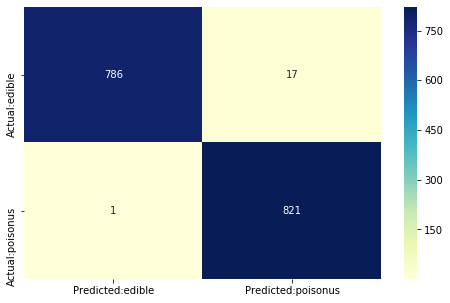

In [37]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_pred4)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:edible','Predicted:poisonus'],index=['Actual:edible','Actual:poisonus'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

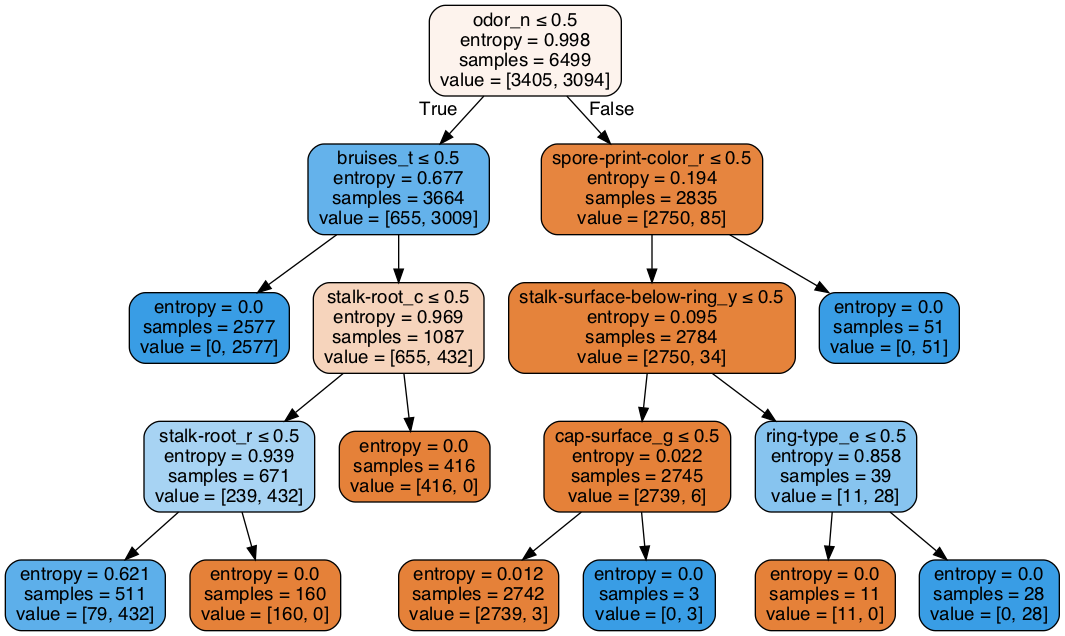

<Figure size 864x1296 with 0 Axes>

In [38]:
plt.figure(figsize=(12,18))
dot_data = StringIO()
export_graphviz(clf4, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('default.png')
Image(graph.create_png())

In [39]:
# create a decision tree with the depth of 5 and metrics as entropy
clf5 = DecisionTreeClassifier(max_depth=5,criterion="entropy")

# Train Decision Tree Classifer
dt5 = clf5.fit(X_train,Y_train)

#Predict the response for test dataset
Y_pred5 = clf5.predict(X_test)

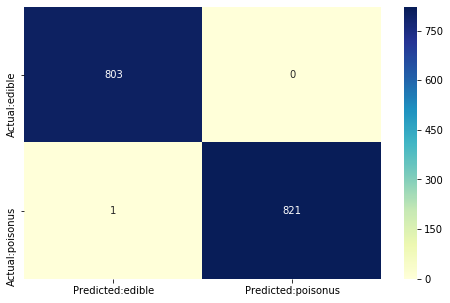

In [40]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_pred5)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:edible','Predicted:poisonus'],index=['Actual:edible','Actual:poisonus'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

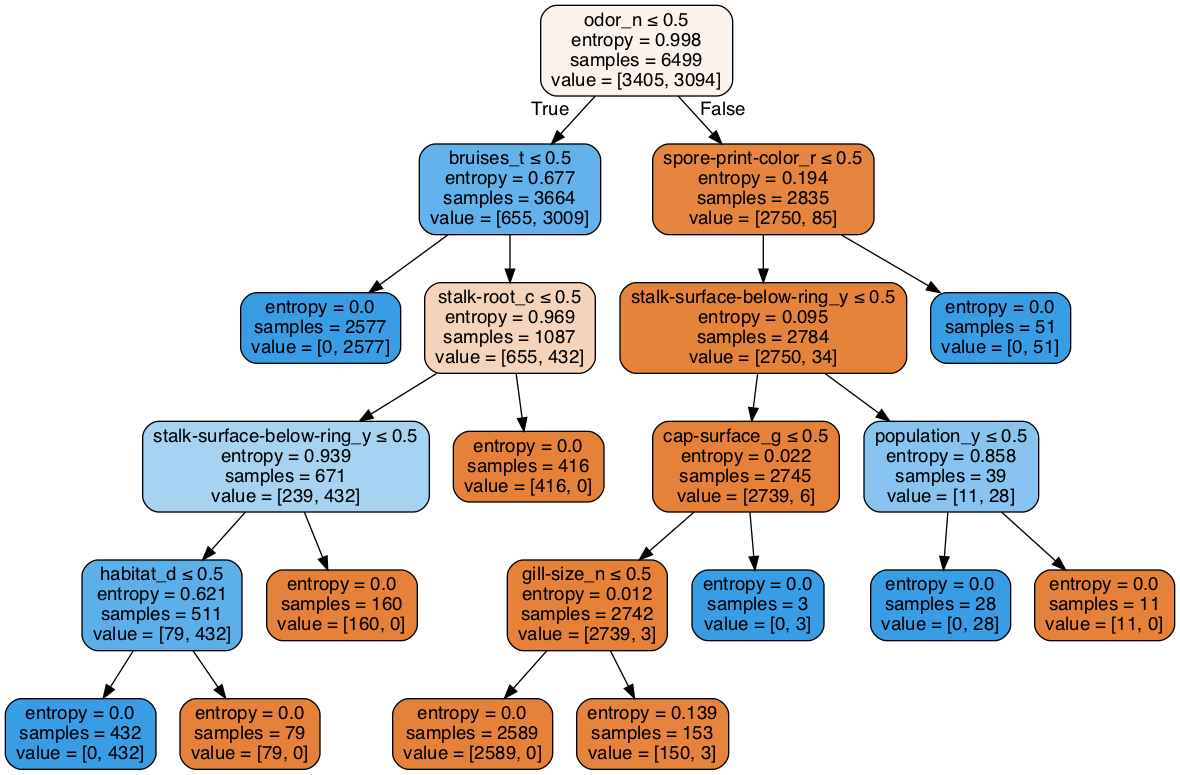

<Figure size 864x1296 with 0 Axes>

In [41]:
plt.figure(figsize=(12,18))
dot_data = StringIO()
export_graphviz(clf5, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('default.png')
Image(graph.create_png())

## Hyper parameter tuning to estimate the best parameters

In [42]:
from numpy import random

In [43]:
parameters_dist = {"max_depth":[1,2,3,4,5,6,7,8],
                  "min_samples_leaf": [10,11,12,13,14,15,16,17,18,19,20],
                  "criterion":["gini","entropy"]}

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
tree = DecisionTreeClassifier(random_state=1)

In [46]:
tree_cv = GridSearchCV(tree,parameters_dist,cv=5)

In [47]:
tree_cv.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=1,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                

In [48]:
tree_cv.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [49]:
tree_cv.best_score_

0.998461301738729

In [51]:
model = tree_cv.best_estimator_

In [52]:
# Train Decision Tree Classifer
dt6_final = model.fit(X_train,Y_train)

#Predict the response for test dataset
Y_pred_final = model.predict(X_test)

In [53]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred_final))

Accuracy: 0.9987692307692307


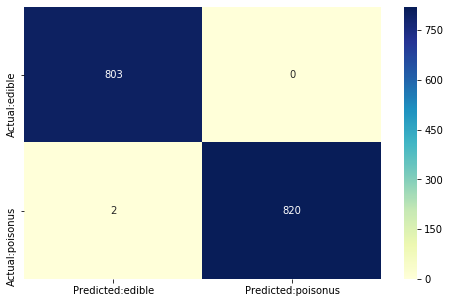

In [54]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_pred_final)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:edible','Predicted:poisonus'],index=['Actual:edible','Actual:poisonus'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

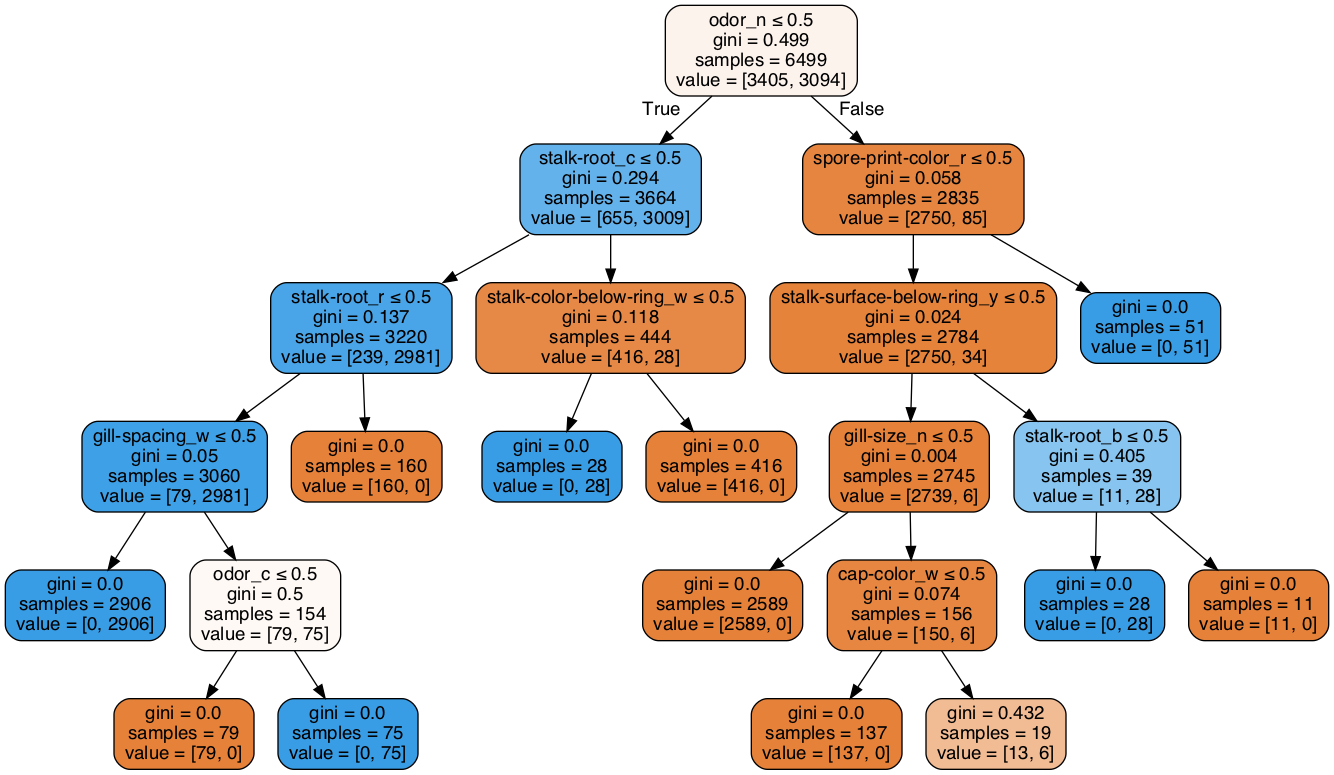

<Figure size 864x1296 with 0 Axes>

In [55]:
plt.figure(figsize=(12,18))
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('final_dt.png')
Image(graph.create_png())
#plt.show()

In [ ]:
Y_train.value_counts()

# Just to cross validate lets iterate over multiple values of depth, metrics as gini and random stats as 1

In [56]:
k_plot=[]
t_plot=[]

for k in range(1,10,1):
     dt=DecisionTreeClassifier(max_depth=k,criterion='gini',random_state=1)
     dt.fit(X_train,Y_train)
     predict=dt.predict(X_test)
     accuracy_test=round(dt.score(X_test,Y_test)*100,2)
     accuracy_train=round(dt.score(X_train,Y_train)*100,2)
     print(k)
     #print('train accuracy of decision tree classifier',accuracy_train)
     #print('test accuracy of decision tree classifier',accuracy_test)
     k_plot.append(accuracy_test)
     t_plot.append(accuracy_train)

1
2
3
4
5
6
7
8
9


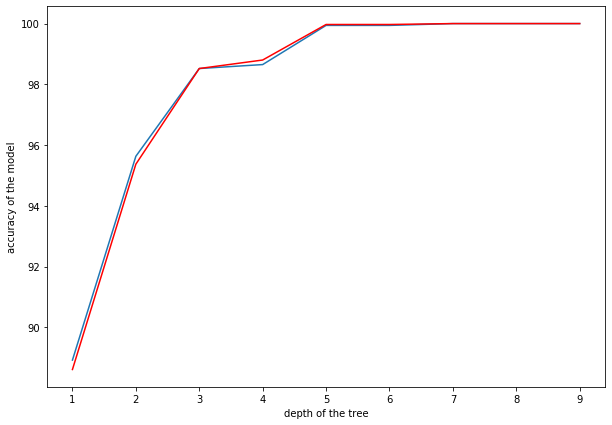

In [57]:
#
fig,axes=plt.subplots(1,1,figsize=(10,7))

axes.set_xticks(range(1,10,1))
k=range(1,10,1)
plt.plot(k,k_plot)
plt.plot(k,t_plot,'r')
plt.xlabel('depth of the tree')
plt.ylabel('accuracy of the model')
plt.show()

In [58]:
model.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.02909443e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.37945772e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.18872494e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.38022495e-02, 0.00000000e+00,
       1.34610198e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.88423407e-03, 1.79608447e-01, 0.00000000e+00, 8.92435824e-02,
      

In [59]:
data=dict(zip(feature_cols, model.feature_importances_))

In [60]:
importances = model.feature_importances_
indices = np.argsort(importances)

In [61]:
df=pd.DataFrame(data,index=indices)

In [62]:
df1=pd.melt(df,var_name='Features', value_name='importance')

In [63]:
df1.drop_duplicates(inplace=True) 

In [64]:
df2=df1[df1['importance']!=0]

In [65]:
df2.sort_values(['importance','Features'],ascending=[False,True],inplace=True)

/Users/nikhilkosare/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


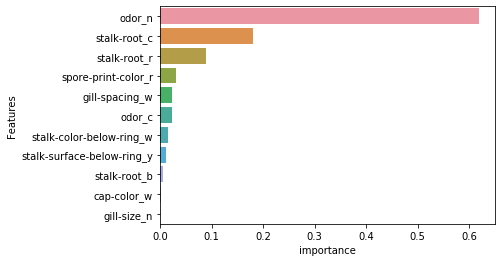

In [66]:
sns.barplot(x='importance',y='Features',data=df2)
plt.show()